<a href="https://colab.research.google.com/github/KatherineSeng/CECS-456-Term-Project/blob/main/CECS_456_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setting up Imports

In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
%matplotlib inline

### Import and View Dataset

In [ ]:
# Test view of data
tsla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [ ]:
# Local Google CoLab filepath, may need to change if running elsewhere
tsla_data = pd.read_csv('/content/TSLA.csv')

In [ ]:
tsla_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2722,2021-04-22,741.500000,753.770020,718.039978,719.690002,719.690002,35590300
2723,2021-04-23,719.799988,737.359985,715.460022,729.400024,729.400024,28370000
2724,2021-04-26,741.000000,749.299988,732.609985,738.200012,738.200012,31038500
2725,2021-04-27,717.960022,724.000000,703.349976,704.739990,704.739990,29437000
2726,2021-04-28,696.409973,708.500000,693.599976,694.400024,694.400024,22196500


### Profiling data

In [ ]:
# Date column is imported as an object data type 
# numpy can't process objects so we change it to datetime64 datatype
tsla_data['Date'] = pd.to_datetime(tsla_data['Date'])

In [ ]:
# Converted 'Date' from object to datetime64 data type
tsla_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
tsla_data.shape

(2727, 7)

In [ ]:
# Check for any NaN fields
tsla_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#check data for null values and show them
tsla_data[tsla_data.isnull().any(axis = 1)]

,Date,Open,High,Low,Close,Adj Close,Volume


### Data Visualization

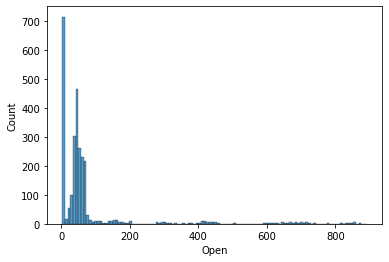

In [ ]:
# Histogram of 'Open' column
sb.histplot(tsla_data.Open)

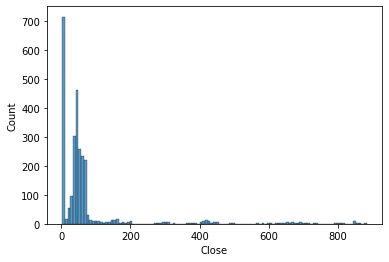

In [ ]:
# Histogram of 'Close' column
sb.histplot(tsla_data.Close)

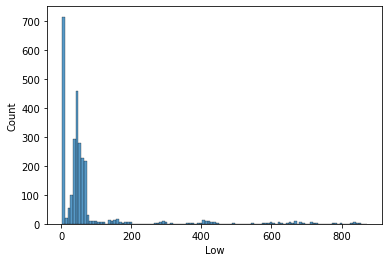

In [ ]:
# Histogram of 'Low' column
sb.histplot(tsla_data.Low)

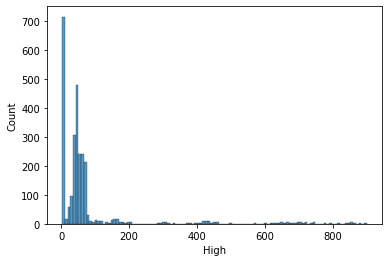

In [ ]:
# Histogram of 'High' column
sb.histplot(tsla_data.High)

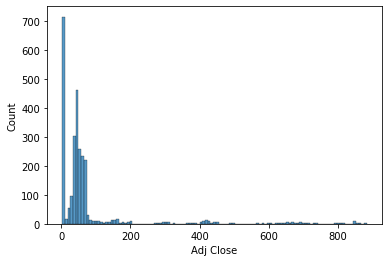

In [ ]:
# Histogram of 'Adj Close' column
sb.histplot(tsla_data['Adj Close'])

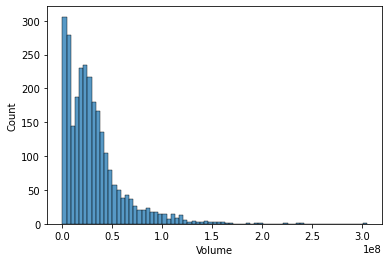

In [ ]:
# Histogram of 'Volume' column
sb.histplot(tsla_data.Volume)

### Prepping Data

Z score shows the number of standard deviations the data set encompasses. 

For our purposes, we'll consider anything outside [-3, 3] as containing outliers

In [ ]:
# Data shape before we groom outliers
tsla_data.shape

(2727, 7)

Outliers in 'Open' column

In [ ]:
z_open = stats.zscore(tsla_data.Open)
print(f"z_score_min: {z_open.min()}")
print(f"z_score_max: {z_open.max()}")

z_score_min: -0.5240895843885134
z_score_max: 5.474583149932016


In [ ]:
# open outliers
z_open = abs(z_open)
open_outliers = np.where(z_open > 3)
open_outliers = list(open_outliers[0])
print(open_outliers)
print(f"There are {len(open_outliers)} outliers in the 'Open' column")

[2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726]
There are 106 outliers in the 'Open' column


In [ ]:
z_high = stats.zscore(tsla_data.High)
print(f"z_score_min: {z_high.min()}")
print(f"z_score_max: {z_high.max()}")

z_score_min: -0.5232835366855512
z_score_max: 5.397859548028425


In [ ]:
# high outliers
z_high = abs(z_high)
high_outliers = np.where(z_high > 3)
high_outliers = list(high_outliers[0])
print(high_outliers)
print(f"There are {len(high_outliers)} outliers in the 'High' column")

[2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726]
There are 106 outliers in the 'High' column


In [ ]:
z_low = stats.zscore(tsla_data.Low)
print(f"z_score_min: {z_low.min()}")
print(f"z_score_max: {z_low.max()}")

z_score_min: -0.526763049779243
z_score_max: 5.503592325243179


In [ ]:
# low outliers
z_low = abs(z_low)
low_outliers = np.where(z_low > 3)
low_outliers = list(low_outliers[0])
print(low_outliers)
print(f"There are {len(low_outliers)} outliers in the 'Low' column")

[2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726]
There are 106 outliers in the 'Low' column


In [ ]:
z_close = stats.zscore(tsla_data.Close)
print(f"z_score_min: {z_close.min()}")
print(f"z_score_max: {z_close.max()}")

z_score_min: -0.5245827156196976
z_score_max: 5.415665968507663


In [ ]:
# close outliers
z_close = abs(z_close)
close_outliers = np.where(z_close > 3)
close_outliers = list(close_outliers[0])
print(close_outliers)
print(f"There are {len(close_outliers)} outliers in the 'Close' column")

[2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726]
There are 106 outliers in the 'Close' column


In [ ]:
z_adjclose = stats.zscore(tsla_data['Adj Close'])
print(f"z_score_min: {z_adjclose.min()}")
print(f"z_score_max: {z_adjclose.max()}")

z_score_min: -0.5245827156196976
z_score_max: 5.415665968507663


In [ ]:
# close outliers
z_adjclose = abs(z_adjclose)
adj_close_outliers = np.where(z_adjclose > 3)
adj_close_outliers = list(adj_close_outliers[0])
print(adj_close_outliers)
print(f"There are {len(adj_close_outliers)} outliers in the 'Adj Close' column")

[2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726]
There are 106 outliers in the 'Adj Close' column


In [ ]:
z_volume = stats.zscore(tsla_data.Volume)
print(f"z_score_min: {z_volume.min()}")
print(f"z_score_max: {z_volume.max()}")

z_score_min: -1.0802106047243274
z_score_max: 9.42609290938694


In [ ]:
# Show outliers
z_volume = abs(z_volume)
volume_outliers = np.where(z_volume > 3)
volume_outliers = list(volume_outliers[0])
print(volume_outliers)
print(f"There are {len(volume_outliers)} outliers in the 'Volume' column")

[720, 721, 723, 733, 766, 767, 783, 795, 822, 846, 864, 892, 920, 921, 1506, 2041, 2042, 2078, 2098, 2154, 2240, 2347, 2348, 2398, 2399, 2401, 2402, 2407, 2413, 2415, 2416, 2417, 2418, 2420, 2423, 2426, 2432, 2433, 2435, 2445, 2446, 2447, 2448, 2464, 2476, 2477, 2526, 2534, 2638]
There are 49 outliers in the 'Volume' column


The Open, High, Low, Close, and Adj Close columns are all highly correlated and have the exact same outliers



In [ ]:
# We drop the adj close column outliers because there are more than in the volume column
tsla_data.drop(adj_close_outliers, inplace=True)

In [ ]:
# New data shape after inplace drop
tsla_data.shape

(2621, 7)

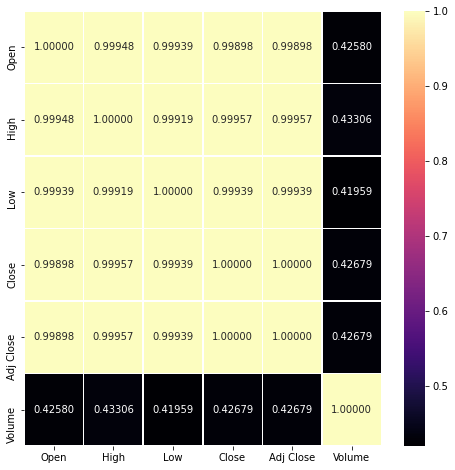

In [ ]:
# We can use a Heatmap to better visualize columns that are correlated
a, b = plt.subplots(figsize=(8, 8))
b = sb.heatmap(tsla_data.corr(), annot=True, linewidths=0.5, fmt=".5f", cmap="magma")

From this heatmap we can see that all columns are highly correlated, with the exception of the 'Volume' column

### Creating the Model

In [ ]:
testing_dataset_size = 0.1 # Data used for testing model
cross_validation_size = 0.1 # Data used to select the best number of samples for predictions
max_prediction_length = 30 # Max number of days used to predict stock price

In [ ]:
def predictPrice(stock_dataset, sample_quantity, offset):

    ## We work with the Adj Close part of our stock dataset.
    working_data = stock_dataset['Adj Close']

    # List for predictions
    stock_price_predictions = []

    # Instantiate Linear Regression object
    linear_regression = LinearRegression()

    for i in range(offset, len(working_data)):

        # converting the dates into simple indices
        x_train = np.array(range(len(working_data[i-sample_quantity:i]))).reshape(-1, 1) 
        
        # Taking values of Adj_close
        y_train = np.array(working_data[i-sample_quantity:i]).reshape(-1, 1) 
        
        # Fit data to linear regression model
        linear_regression.fit(x_train, y_train)
        
        # Predict the price on num_of_sample day
        test_prediction = linear_regression.predict(np.array(sample_quantity).reshape(-1, 1))
        stock_price_predictions.append(test_prediction[0][0])
    
    return stock_price_predictions

In [ ]:
# Test data size
test_data_size = int(len(tsla_data) * testing_dataset_size)

# Cross Validation data size
cv_data_size = int(len(tsla_data) * cross_validation_size) 

# Training data size
training_data_size = len(tsla_data) - test_data_size - cv_data_size 

# Split the stock data into different sections
training_data = tsla_data[:training_data_size].copy()
cross_validation_data = tsla_data[training_data_size:training_data_size+cv_data_size].copy()
training_cross_val = tsla_data[:training_data_size + cv_data_size].copy()
testing_data = tsla_data[training_data_size+cv_data_size:].copy()

print(f"Training data shape: {training_data.shape}")
print(f"Cross Validation data shape: {cross_validation_data.shape}")
print(f"Training and Cross Validation data shape: {training_cross_val.shape}")
print(f"Testing data shape: {testing_data.shape}")

Training data shape: (2097, 7)
Cross Validation data shape: (262, 7)
Training and Cross Validation data shape: (2359, 7)
Testing data shape: (262, 7)


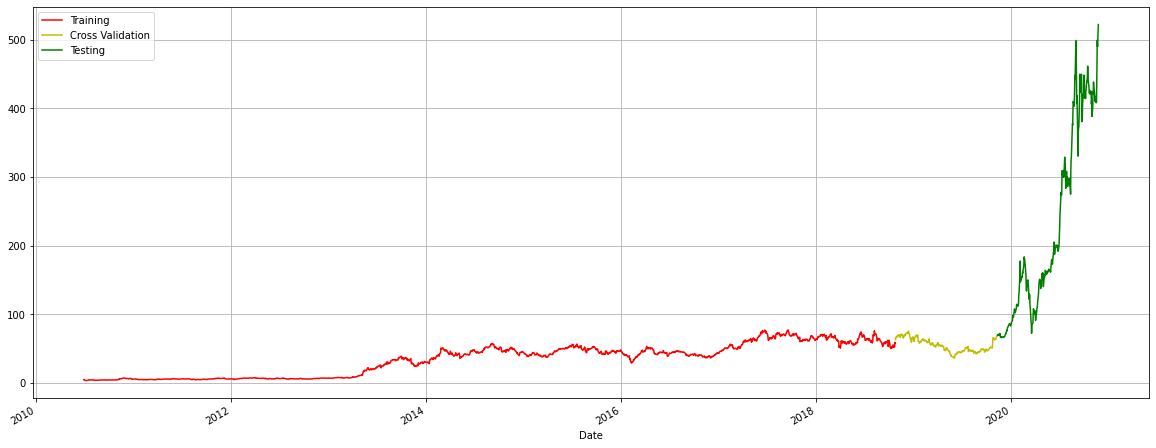

In [ ]:
# Data breakdown visualization
mpl.rcParams['figure.figsize'] = 20,8
ax = training_data.plot(x='Date', y='Adj Close', style='r-')
ax = cross_validation_data.plot(x='Date', y='Adj Close', style='y-', ax=ax)
ax = testing_data.plot(x='Date', y='Adj Close', style='g-', ax=ax)
plt.legend(['Training', 'Cross Validation', 'Testing'])
plt.grid()
plt.show()

In [ ]:
# Root mean square error list
root_mean_square_error = [] 

# R^2 error list
r2_error = []

# Predict the price of the given samples
for num_of_samples in range(1, max_prediction_length + 1):

    prediction = predictPrice(training_cross_val, num_of_samples, training_data_size)

    # Add the current predicted value to the cv dataset
    cross_validation_data.loc[:, 'prediction_for_N_' + str(num_of_samples)] = prediction
    
    # Calculate the root_mean_square_error value and append it to the root_mean_square_error list
    root_mean_square_error.append(mse(prediction, cross_validation_data['Adj Close'], squared=False))
    
    # Calculate the r2_score and append it to r2_error list
    r2_error.append(r2_score(prediction, cross_validation_data['Adj Close']))

In [ ]:
cross_validation_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,prediction_for_N_1,prediction_for_N_2,prediction_for_N_3,prediction_for_N_4,prediction_for_N_5,prediction_for_N_6,prediction_for_N_7,prediction_for_N_8,prediction_for_N_9,prediction_for_N_10,prediction_for_N_11,prediction_for_N_12,prediction_for_N_13,prediction_for_N_14,prediction_for_N_15,prediction_for_N_16,prediction_for_N_17,prediction_for_N_18,prediction_for_N_19,prediction_for_N_20,prediction_for_N_21,prediction_for_N_22,prediction_for_N_23,prediction_for_N_24,prediction_for_N_25,prediction_for_N_26,prediction_for_N_27,prediction_for_N_28,prediction_for_N_29,prediction_for_N_30
2354,2019-11-04,62.959999,64.388000,61.852001,63.493999,63.493999,43935000,62.661999,62.339997,62.542666,62.532000,61.680800,61.569733,63.335714,66.410356,67.734055,68.271599,68.178508,67.693333,67.223384,66.767846,66.309581,66.064500,65.828176,65.537163,65.302772,65.069611,64.916105,64.680104,64.237123,63.783805,63.413140,63.032086,62.658416,62.497714,62.393231,62.021366
2355,2019-11-05,63.924000,64.702003,63.223999,63.444000,63.444000,34717000,63.493999,64.325999,63.556664,63.323999,63.125199,62.287599,62.019714,63.427499,66.151721,67.472665,68.115526,68.174969,67.847230,67.503142,67.149009,66.773950,66.584691,66.395098,66.146702,65.945537,65.740705,65.607818,65.393320,64.977391,64.547160,64.192535,63.825134,63.462365,63.303088,63.197508
2356,2019-11-06,63.599998,65.344002,62.900002,65.316002,65.316002,39704500,63.444000,63.394001,63.982000,63.698999,63.535400,63.353733,62.605428,62.288428,63.460666,65.911732,67.211054,67.922423,68.097076,67.896725,67.659447,67.395099,67.096588,66.961372,66.818491,66.613579,66.447733,66.273870,66.164917,65.975036,65.588740,65.184492,64.849288,64.498968,64.150586,63.996703
2357,2019-11-07,65.828003,68.300003,65.603996,67.108002,67.108002,72336500,65.316002,67.188004,65.906670,65.707003,65.213801,64.861868,64.536573,63.741644,63.309279,64.229734,66.390509,67.599606,68.304846,68.524308,68.390286,68.210850,67.996515,67.741765,67.634492,67.516074,67.335229,67.188156,67.030799,66.933327,66.756700,66.389317,66.001596,65.677667,65.337128,64.996603
2358,2019-11-08,66.900002,67.491997,66.500000,67.428001,67.428001,30346000,67.108002,68.900002,68.953337,68.019003,67.619003,67.021202,66.539145,66.094073,65.244613,64.705868,65.404510,67.298001,68.395693,69.061363,69.288991,69.186950,69.036927,68.848915,68.617966,68.522727,68.414962,68.245871,68.106989,67.956769,67.862681,67.691773,67.335995,66.958318,66.640109,66.304345


In [ ]:
print(root_mean_square_error)

[1.8277919044459938, 2.5403211078140813, 2.2519431448919467, 2.329602023401617, 2.3702385582247625, 2.4420343421172976, 2.5342382261911354, 2.5915249578930224, 2.6250091336639905, 2.661592284046453, 2.7165680653795437, 2.782902760161724, 2.8479470424231463, 2.9087457405832025, 2.9787543101537945, 3.0574787393697993, 3.148254017075819, 3.235345864193674, 3.3065415041898913, 3.3814454529750346, 3.4560632116639995, 3.5197780092566116, 3.5700088229588407, 3.6078275360920906, 3.642921599368092, 3.6736975881696443, 3.698927483551408, 3.7218445430682383, 3.7388746160603237, 3.7579999385604257]


In [ ]:
print(r2_error)

[0.9636555543074847, 0.9349068664140386, 0.9482000338268212, 0.9445206149309743, 0.9425267590795686, 0.9390070612925089, 0.9343619609906672, 0.9314193743894874, 0.92974909563138, 0.9280016602271841, 0.92530362268497, 0.9219006026419378, 0.9183774035383414, 0.9149435915351867, 0.9108310477143915, 0.906050589109763, 0.9003670022389448, 0.8947265517264382, 0.8899500979654024, 0.884810541287153, 0.8795429960507629, 0.8748950319031716, 0.8711149458847738, 0.8681806783251691, 0.8654260150624963, 0.8629699381380433, 0.8609232797228802, 0.8590888844243127, 0.857748620408999, 0.8562966109205472]


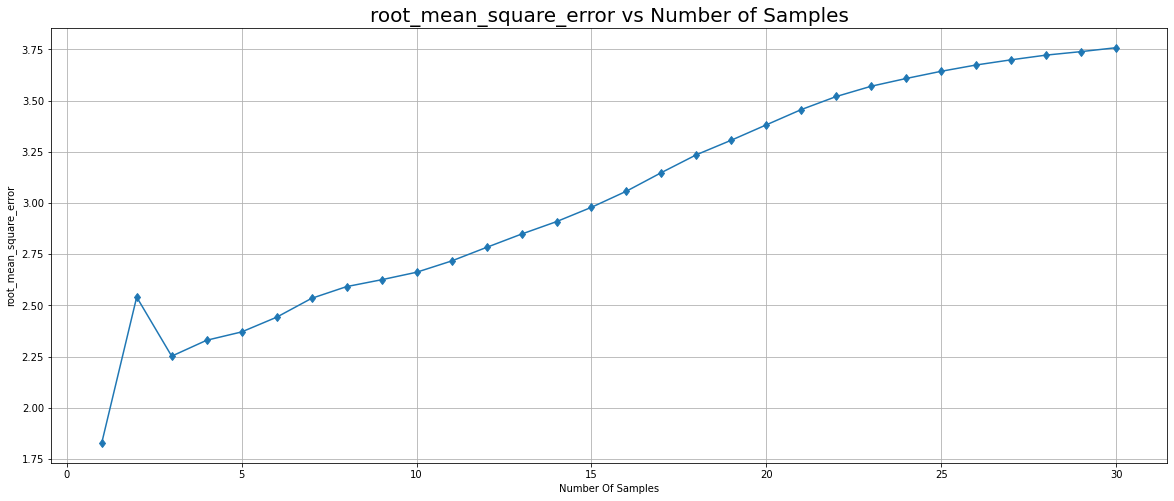

In [ ]:
x = np.arange(1, max_prediction_length+1)
plt.plot(x, root_mean_square_error, 'd-')
plt.xlabel("Number Of Samples")
plt.ylabel("root_mean_square_error")
plt.title("root_mean_square_error vs Number of Samples", size = 20)
plt.grid()
plt.show()

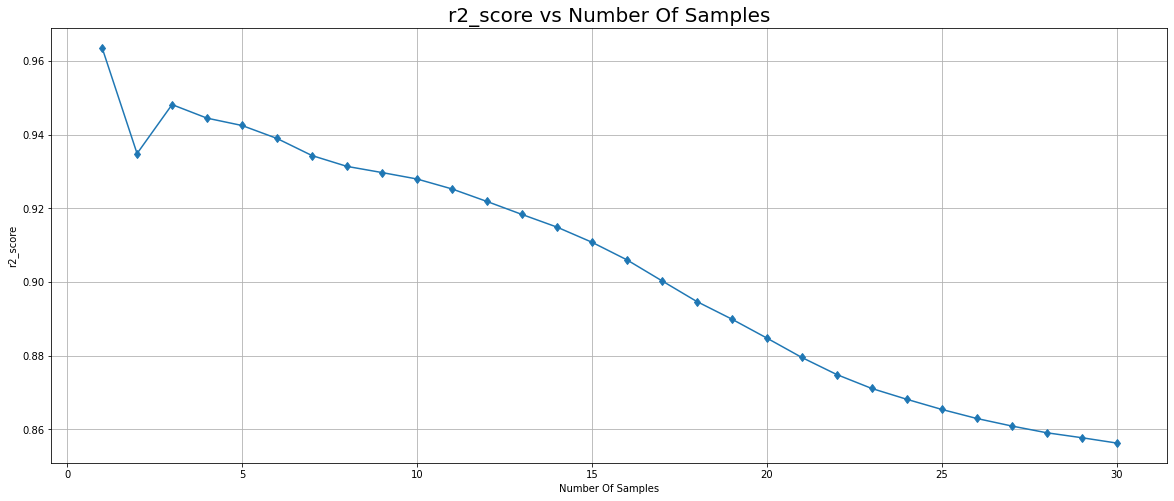

In [ ]:
plt.plot(x,r2_error,'d-')
plt.xlabel("Number Of Samples")
plt.ylabel("r2_score")
plt.title("r2_score vs Number Of Samples", size = 20)
plt.grid()
plt.show()

Graph of actual values vs predicted values for samples = 3

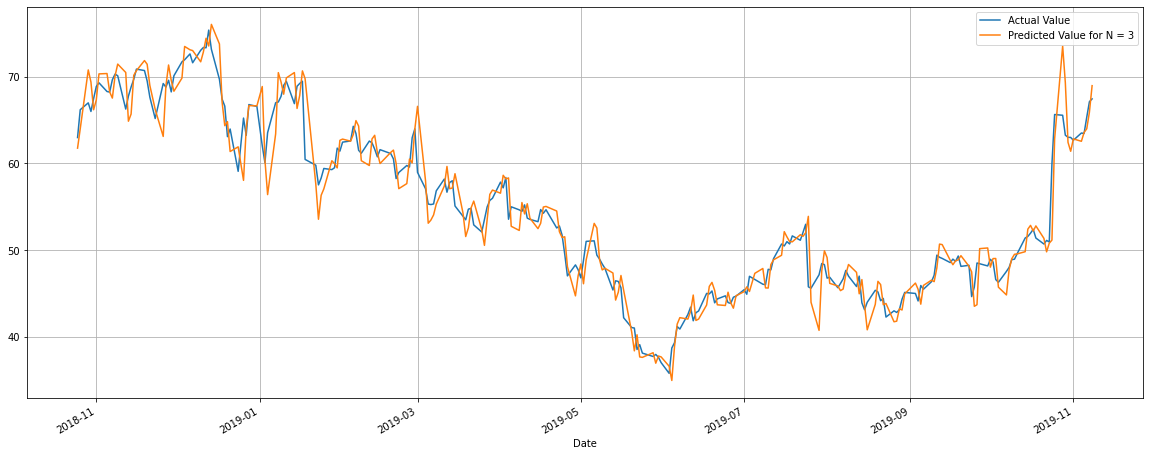

In [ ]:
ax = cross_validation_data.plot(x='Date', y='Adj Close')
ax = cross_validation_data.plot(x='Date', y='prediction_for_N_3', ax = ax)
plt.grid()
plt.legend(['Actual Value', 'Predicted Value for N = 3'])
plt.show()

Predictions on Test Data

In [ ]:
num_of_samples = 3 
predicted_adj_close = predictPrice(tsla_data, num_of_samples, training_data_size + cv_data_size)
testing_data.loc[:,"Predicted Adj Close"] = predicted_adj_close 

In [ ]:
testing_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Predicted Adj Close
2616,2020-11-17,460.170013,462.000000,433.010010,441.609985,441.609985,61188300,405.779988
2617,2020-11-18,448.350006,496.000000,443.500000,486.640015,486.640015,78044000,452.509979
2618,2020-11-19,492.000000,508.609985,487.570007,499.269989,499.269989,62475300,523.996684
2619,2020-11-20,497.989990,502.500000,489.059998,489.609985,489.609985,32911900,533.500000
2620,2020-11-23,503.500000,526.000000,501.790009,521.849976,521.849976,50260300,494.809966


In [ ]:
# R2 accuracy test
r2_accuracy = r2_score(testing_data['Adj Close'], predicted_adj_close)
print(r2_accuracy)

0.9844374104767993


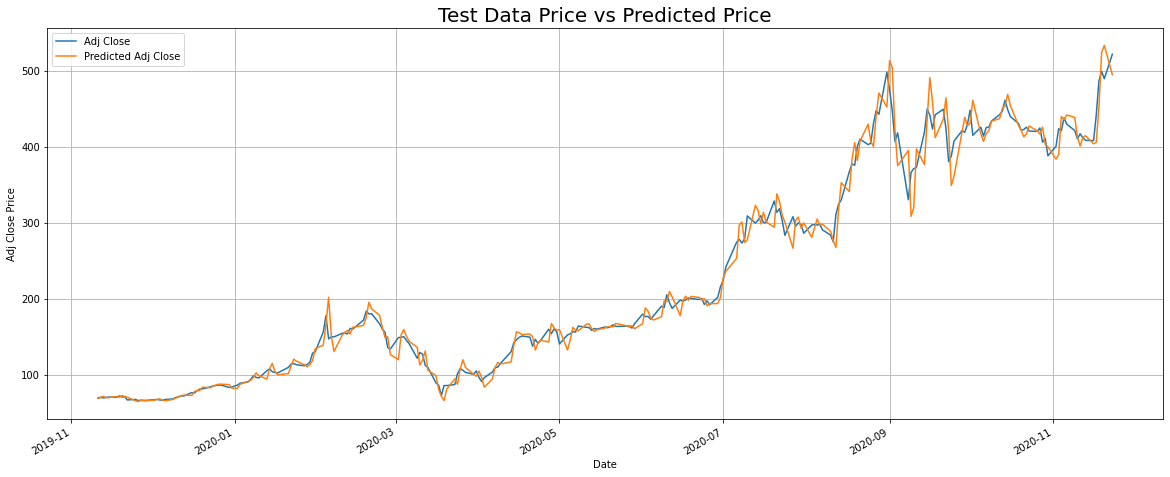

In [ ]:
#Visualization on test data and predicted value
ax = testing_data.plot(x='Date',y='Adj Close')
ax = testing_data.plot(x='Date',y='Predicted Adj Close',ax = ax)
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.title("Test Data Price vs Predicted Price",size = 20)
plt.show()